In [1]:
import numpy as np 
import pandas as pd 
import scipy as sp 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from glob import glob
import scipy.constants as const
from scipy.signal import find_peaks

import warnings
warnings.filterwarnings("ignore")
# plt.style.use("plot_style.mplstyle")

In [2]:
frequency_target_THz = {
            '0' : {'0': 230.35,'1': 229.95,'2': 229.55,'3': 229.15,'4': 228.75,'5': 228.35,'6': 227.95,'7': 227.55},
            '1' : {'0': 230.15,'1': 229.75,'2': 229.35,'3': 228.95,'4': 228.55,'5': 228.15,'6': 227.75,'7': 227.35},
            }
wavelength_target_nm = {
            '0' : {'0': 1301.47,'1': 1303.73,'2': 1306.01,'3': 1308.28,'4': 1310.57,'5': 1312.87,'6': 1315.17,'7': 1317.48},
            '1': {'0': 1302.6,'1': 1304.87,'2': 1307.14,'3': 1309.43,'4': 1311.72,'5': 1314.02,'6': 1316.33,'7': 1318.64}
            }

freq_target_THz_A = [230.35, 229.95, 229.55, 229.15, 228.75, 228.35, 227.95, 227.55]
freq_target_THz_B = [230.15, 229.75, 229.35, 228.95, 228.55, 228.15, 227.75, 227.35]
wavelength_target_nm_A = [1301.47, 1303.73, 1306.01, 1308.28, 1310.57, 1312.87, 1315.17, 1317.48]
wavelength_target_nm_B = [1302.6, 1304.87, 1307.14, 1309.43, 1311.72, 1314.02, 1316.33, 1318.64]

In [3]:
wavelength_target_nm.items()

dict_items([('0', {'0': 1301.47, '1': 1303.73, '2': 1306.01, '3': 1308.28, '4': 1310.57, '5': 1312.87, '6': 1315.17, '7': 1317.48}), ('1', {'0': 1302.6, '1': 1304.87, '2': 1307.14, '3': 1309.43, '4': 1311.72, '5': 1314.02, '6': 1316.33, '7': 1318.64})])

In [4]:
frequency_target_THz.items()

dict_items([('0', {'0': 230.35, '1': 229.95, '2': 229.55, '3': 229.15, '4': 228.75, '5': 228.35, '6': 227.95, '7': 227.55}), ('1', {'0': 230.15, '1': 229.75, '2': 229.35, '3': 228.95, '4': 228.55, '5': 228.15, '6': 227.75, '7': 227.35})])

In [5]:
def spectrum_plot(tile_spectrum, yticks_range, title):
              fig, ax = plt.subplots(figsize=(10,4))
              plt.plot(tile_spectrum['wavelength'], tile_spectrum['bank0']+2, linewidth = 2.5, color='r', label='Fiber-1')
              plt.plot(tile_spectrum['wavelength'], tile_spectrum['bank1']+2, linewidth = 2.5, color='b', label='Fiber-2')
              for band_key, bank_dict in wavelength_target_nm.items():
                            for bank_key, wavelength in bank_dict.items():
                                          if band_key == '0':        
                                                        ax.axvspan(wavelength-0.1/17*20,wavelength+0.1/17*20, alpha=0.1, color='gray')
                                          else:
                                                        ax.axvspan(wavelength-0.1/17*20,wavelength+0.1/17*20, alpha=0.1, color='green')

              plt.legend(loc=4)
              plt.grid(True)
              plt.xlim(1300, 1320)
              plt.xticks(np.arange(1300, 1322, 2))
              plt.ylim([np.min(yticks_range), np.max(yticks_range)])
              plt.yticks(yticks_range)
              # plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=False, labelbottom=True)
              plt.xlabel('Wavelength (nm)')   
              plt.ylabel('Optical Power (dBm)')   
              # plt.title(title)
              plt.tight_layout()

In [6]:
tile_opo_5_bank_A_total_power = 90.22
tile_opo_5_bank_B_total_power = 105.5

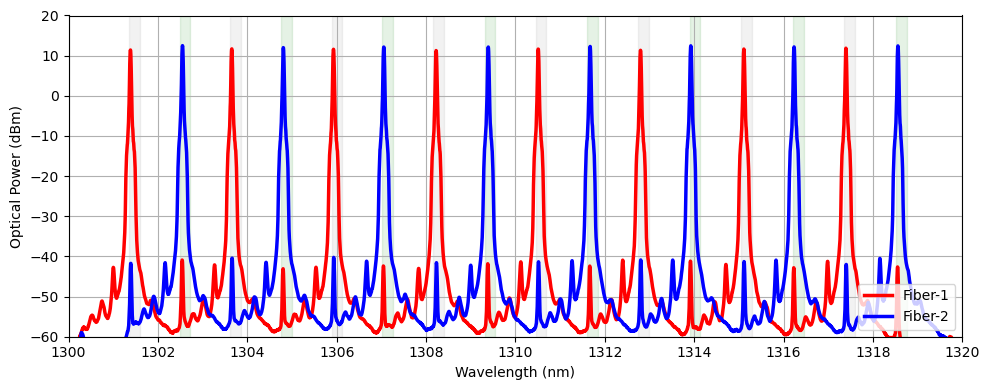

In [7]:
tile_opo_05 = pd.read_csv('tile_opo/328_05_TP2_3_Spectrum_45p5C.csv')
spectrum_plot(tile_opo_05, yticks_range=np.arange(-60, 30, 10), title='Tile OPO #05 at 45.5C')

In [8]:
peaks_tile_opo_5_bank_A_wavelengths = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_5_bank_B_wavelengths = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_5_bank_A_frequencies = const.c/tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank0'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_5_bank_B_frequencies = const.c/tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank1'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_5_bank_A_wavelength_error = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank0'], height=-20)[0].tolist()] - wavelength_target_nm_A
peaks_tile_opo_5_bank_B_wavelength_error = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank1'], height=-20)[0].tolist()] - wavelength_target_nm_B
peaks_tiles_opo_5_bank_A_frequency_error = peaks_tile_opo_5_bank_A_frequencies - freq_target_THz_A
peaks_tiles_opo_5_bank_B_frequency_error = peaks_tile_opo_5_bank_B_frequencies - freq_target_THz_B
channel_spacing_tile_opo_5_bank_A = np.diff(peaks_tile_opo_5_bank_A_frequencies)
channel_spacing_tile_opo_5_bank_B = np.diff(peaks_tile_opo_5_bank_B_frequencies)


peaks_tile_opo_5_bank_A_powers_dBm = find_peaks(tile_opo_05['bank0'], height=-20)[1]['peak_heights']
peaks_tile_opo_5_bank_B_powers_dBm = find_peaks(tile_opo_05['bank1'], height=-20)[1]['peak_heights']

peaks_tile_opo_5_bank_A_powers_mW = 10**(peaks_tile_opo_5_bank_A_powers_dBm/10)
peaks_tile_opo_5_bank_B_powers_mW = 10**(peaks_tile_opo_5_bank_B_powers_dBm/10)

tile_opo_5_bank_A_powers_dB = (((peaks_tile_opo_5_bank_A_powers_mW - np.mean(peaks_tile_opo_5_bank_A_powers_mW))/np.mean(peaks_tile_opo_5_bank_A_powers_mW) + 1) * tile_opo_5_bank_A_total_power / 8)
tile_opo_5_bank_B_powers_dB = (((peaks_tile_opo_5_bank_B_powers_mW - np.mean(peaks_tile_opo_5_bank_B_powers_mW))/np.mean(peaks_tile_opo_5_bank_B_powers_mW) + 1) * tile_opo_5_bank_B_total_power / 8)


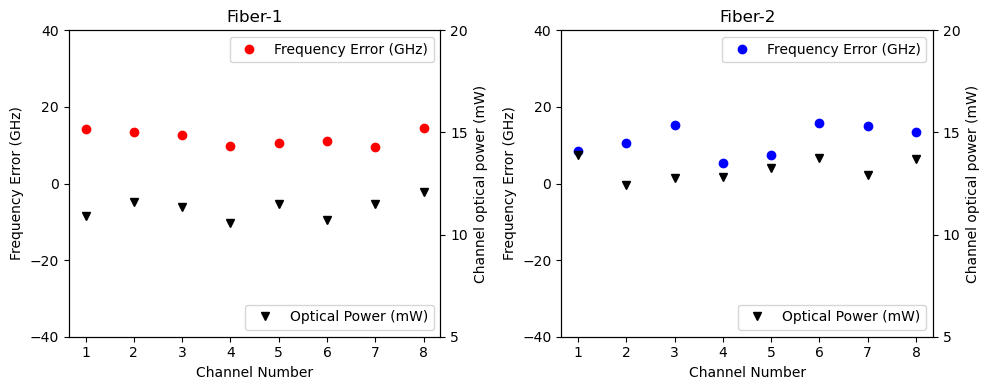

In [9]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
ax1.plot(np.linspace(1,8,8), peaks_tiles_opo_5_bank_A_frequency_error*1e3, 'ro', label='Frequency Error (GHz)')
# ax1.plot(np.linspace(9,16,8), peaks_tiles_opo_5_bank_B_frequency_error*1e3, 'ro')
ax1.legend(fontsize=10, loc=1)
ax1.set_xticks(np.arange(1, 9, 1))
ax1.set_yticks(np.arange(-40, 60, 20))
ax1.set_title('Fiber-1')
ax1.set_ylabel('Frequency Error (GHz)')
ax1.set_xlabel('Channel Number')


ax2 = ax1.twinx()
ax2.plot(np.linspace(1,8,8), tile_opo_5_bank_A_powers_dB, 'kv', label='Optical Power (mW)')
# ax2.plot(np.linspace(9,16,8), tile_opo_5_bank_B_powers_dB, 'bv')
ax2.legend(fontsize=10, loc=4)
# ax2.set_xticks(np.arange(0, 17, 4))
ax2.set_yticks(np.arange(5, 22, 5))
# ax2.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
ax2.set_ylabel('Channel optical power (mW)')

ax1 = plt.subplot(122)
ax1.plot(np.linspace(1,8,8), peaks_tiles_opo_5_bank_B_frequency_error*1e3, 'bo', label='Frequency Error (GHz)')
# ax1.plot(np.linspace(9,16,8), peaks_tiles_opo_5_bank_B_frequency_error*1e3, 'ro')
ax1.legend(fontsize=10, loc=1)
ax1.set_xticks(np.arange(1, 9, 1))
ax1.set_yticks(np.arange(-40, 60, 20))
ax1.set_title('Fiber-2')
# ax1.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
ax1.set_ylabel('Frequency Error (GHz)')
ax1.set_xlabel('Channel Number')


ax2 = ax1.twinx()
ax2.plot(np.linspace(1,8,8), tile_opo_5_bank_B_powers_dB, 'kv', label='Optical Power (mW)')
# ax2.plot(np.linspace(9,16,8), tile_opo_5_bank_B_powers_dB, 'bv')
ax2.legend(fontsize=10, loc=4)
# ax2.set_xticks(np.arange(0, 17, 4))
ax2.set_yticks(np.arange(5, 22, 5))
# ax2.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
ax2.set_ylabel('Channel optical power (mW)')

plt.tight_layout()

In [16]:
tile_opo_5_bank_A_powers_dB

array([10.90088737, 11.61902944, 11.35148951, 10.55824784, 11.47944396,
       10.7144986 , 11.50850345, 12.08789983])

In [17]:
tile_opo_5_bank_B_powers_dB

array([13.89754465, 12.4039806 , 12.78168405, 12.82354435, 13.25372875,
       13.74700461, 12.9121356 , 13.68037739])

In [10]:
peaks_tile_opo_5_bank_A_wavelengths = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_5_bank_B_wavelengths = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank1'], height=-20)[0].tolist()]

In [11]:
currents_tile_opo_5_bank_A = [150, 146, 142, 137, 134, 136, 143, 141]
currents_tile_opo_5_bank_B = [143, 131, 130, 139, 143, 140, 140, 147]

In [12]:
center_wavelength_error = [np.mean(np.append(peaks_tile_opo_5_bank_A_wavelength_error, peaks_tile_opo_5_bank_B_wavelength_error))]
center_wavelength_error

[-0.07112499999998079]

In [13]:
center_frequency_error = [np.mean(np.append(peaks_tiles_opo_5_bank_A_frequency_error, peaks_tiles_opo_5_bank_B_frequency_error))]
center_frequency_error

[0.011737201249268026]

In [14]:
peaks_tiles_opo_5_bank_A_frequency_error

2846    0.014334
3413    0.013562
3982    0.012777
4556    0.009882
5127    0.010494
5700    0.011105
6278    0.009640
6849    0.014421
Name: wavelength, dtype: float64

In [15]:
peaks_tiles_opo_5_bank_B_frequency_error

3137    0.008472
3701    0.010530
4263    0.015364
4848    0.005468
5418    0.007488
5981    0.015752
6559    0.014974
7140    0.013531
Name: wavelength, dtype: float64

In [22]:
np.sum(np.append(np.array(currents_tile_opo_5_bank_A), np.array(currents_tile_opo_5_bank_A))) * 1e-3 * (0.1 + 0.4 + 1.5) + 1.5 + 14/16

6.891